<a href="https://colab.research.google.com/github/s2li2/AIDL.Sara/blob/main/Pre_trained_CNN_model_codeURL(Gender).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/traindata'  # Update with your actual path
test_dir = '/content/drive/MyDrive/testdata'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/traindata/men')))
print(len(os.listdir('/content/drive/MyDrive/traindata/women')))
print(len(os.listdir('/content/drive/MyDrive/testdata/men')))
print(len(os.listdir('/content/drive/MyDrive/testdata/women')))

1000
1000
300
300


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1585 images belonging to 2 classes.
Found 396 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 4s 0us/step


In [6]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [7]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
50/50 [==============================] - 811s 16s/step - loss: 2.0529 - accuracy: 0.5388 - val_loss: 1.0015 - val_accuracy: 0.4975
Epoch 2/3
50/50 [==============================] - 556s 11s/step - loss: 0.7019 - accuracy: 0.5950 - val_loss: 0.7214 - val_accuracy: 0.5732
Epoch 3/3
50/50 [==============================] - 593s 12s/step - loss: 0.6231 - accuracy: 0.6467 - val_loss: 0.9093 - val_accuracy: 0.4949


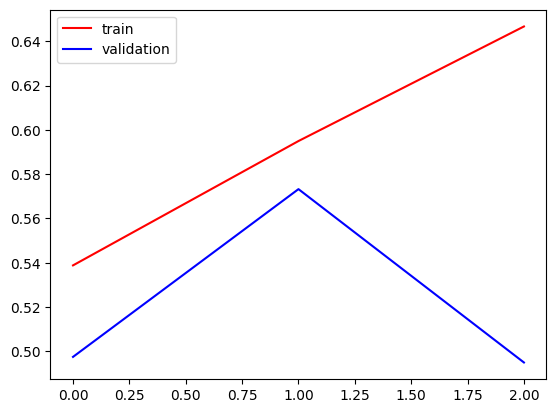

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

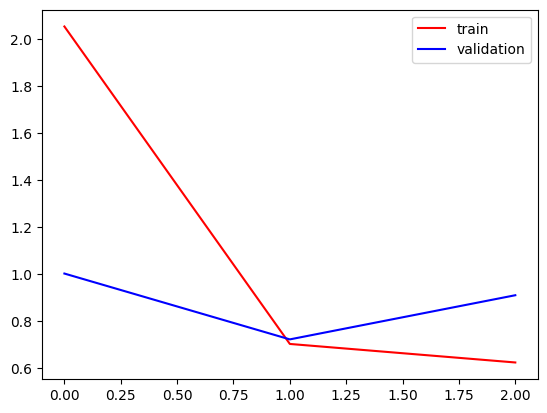

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 599 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

19/19 [==============================] - 226s 12s/step
[[0.03585015]
 [0.5948042 ]
 [0.47458625]
 [0.20758872]
 [0.09368113]
 [0.43814906]
 [0.00098899]
 [0.3771128 ]
 [0.15658593]
 [0.09619504]
 [0.16875654]
 [0.2935699 ]
 [0.21880352]
 [0.341326  ]
 [0.24090977]
 [0.30536133]
 [0.5834193 ]
 [0.2817799 ]
 [0.10696744]
 [0.00240152]
 [0.06165123]
 [0.16121826]
 [0.27752438]
 [0.26359284]
 [0.13297795]
 [0.13751638]
 [0.38983977]
 [0.34276086]
 [0.3929792 ]
 [0.00806657]
 [0.10301416]
 [0.19746657]
 [0.2369865 ]
 [0.11336057]
 [0.12077896]
 [0.14481343]
 [0.08495153]
 [0.06362963]
 [0.05605676]
 [0.38435805]
 [0.09464113]
 [0.20821005]
 [0.42376044]
 [0.17910816]
 [0.3328104 ]
 [0.2235875 ]
 [0.15549673]
 [0.16405338]
 [0.1584168 ]
 [0.16601506]
 [0.15273851]
 [0.08318587]
 [0.14912243]
 [0.01896242]
 [0.3049929 ]
 [0.06338896]
 [0.0473399 ]
 [0.28510064]
 [0.22918792]
 [0.30369294]
 [0.30276373]
 [0.1886136 ]
 [0.18932582]
 [0.2186932 ]
 [0.11221571]
 [0.42204544]
 [0.17469017]
 [0.329

In [13]:
len(predictions)

599

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

#Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[293   7]
 [294   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.98      0.66       300
           1       0.42      0.02      0.03       299

    accuracy                           0.50       599
   macro avg       0.46      0.50      0.35       599
weighted avg       0.46      0.50      0.35       599

